The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

a. Load the data : 
    1. Read the “housing.csv” file from the folder into the program.
    2. Print first few rows of this data.
    3. Extract input (X) and output (Y) data from the dataset.

b. Handle missing values : 
    1. Fill the missing values with the mean of the respective column.

c. Encode categorical data : 
    1. Convert categorical column in the dataset to numerical data.

d. Split the dataset : 
    1. Split the data into 80% training dataset and 20% test dataset.

e. Standardize data : 
    1. Standardize training and test datasets.

f. Perform Linear Regression : 

    1. Perform Linear Regression on training data.
    2. Predict output for test dataset using the fitted model.
    3. Print root mean squared error (RMSE) from Linear Regression. [ HINT: Import mean_squared_error from sklearn.metrics ]

g. Bonus exercise: Perform Linear Regression with one independent variable :

    1. Extract just the median_income column from the independent variables (from X_train and X_test).
    2. Perform Linear Regression to predict housing values based on median_income.
    3. Predict output for test dataset using the fitted model.
    4. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.


In [154]:
import numpy as np
import pandas as pd
from pandas import read_excel
import os

In [155]:
#Read csv file into DF 
data = pd.read_excel("C:\\Users\\adity\\OneDrive\\Documents\\Data Science\\Data Science With Python\\1553768847_housing.xlsx")

In [156]:
#Display the first 5 entries
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [157]:
#check if any cols has NA Values
data.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [158]:
#Replace NA Values in total_bedrooms col with mean value of the column
data["total_bedrooms"].fillna(np.mean(data["total_bedrooms"]), inplace = True)

In [159]:
#Verify if its replaced in DF
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [160]:
#check the types of each column
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [161]:
#Convert categorical column to numerical
cleanup_nums = {"ocean_proximity": {"<1H OCEAN": 1, "INLAND": 2, "ISLAND": 3, "NEAR BAY": 4,
                                  "NEAR OCEAN": 5 }}
data.replace(cleanup_nums, inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,4,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,4,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,4,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,4,342200


In [162]:
#verify the types of each column
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity         int64
median_house_value      int64
dtype: object

In [163]:
#Create X Variable
X = data.iloc[:,0:9]
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,4
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,4
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,4


In [164]:
#Create Y Variable
Y = data.iloc[:,9:10]
Y.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


Perform Linear Regression

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [166]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(16512, 9) (4128, 9) (16512, 1) (4128, 1)


In [167]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [168]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train_std, Y_train)
Y_test_pred = lr.predict(X_test_std)

In [169]:
df = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_test_pred.flatten()})
df

,Actual,Predicted
0,47700,75616.187338
1,45800,166419.136552
2,500001,264751.073031
3,218600,275770.176065
4,278000,278280.668055
...,...,...
4123,263300,207896.788258
4124,266800,251889.443159
4125,500001,439690.112774
4126,72300,130408.051819


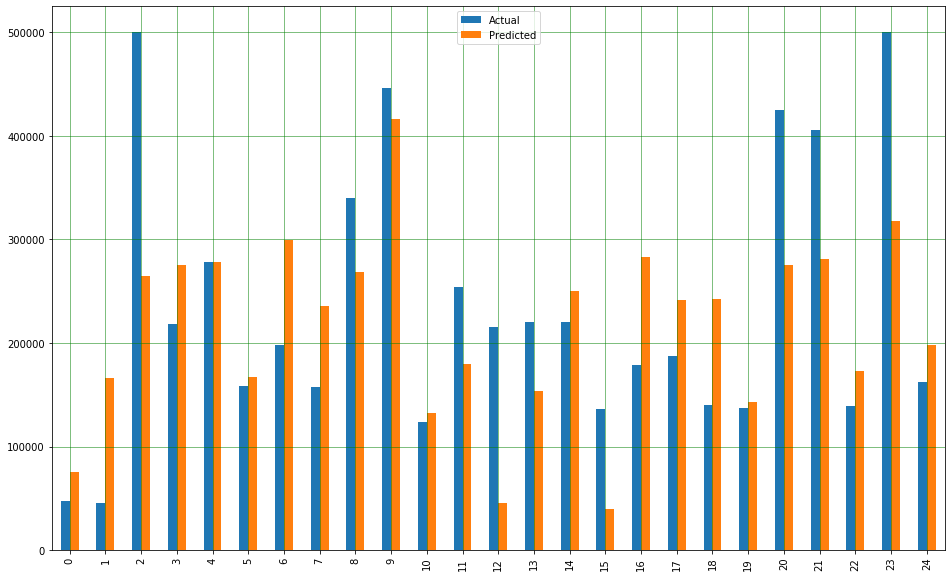

In [170]:
#Plot bar chart for Y_Test and Y_Pred , and compare the values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [171]:
#Print RMSE Value
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
RMSE

71098.69982050032

In [173]:
#Print the accuracy 
lr.score(X_test_std,Y_test)

0.6142406531011787

RMSE = 71098.69982050032 and Accuracy = 0.6142406531011787 , hence from the values we conclude that the model is not good since the RMSE is high and accuracy score is low.

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [174]:
X_med_train = X_train.iloc[:,7:8]
X_med_train.head()
X_med_test = X_test.iloc[:,7:8]
X_med_test.head()

,median_income
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250


In [175]:
scaler.fit(X_med_train)

X_med_train_std = scaler.transform(X_med_train)
X_med_test_std = scaler.transform(X_med_test)

In [176]:
lr.fit(X_med_train_std, Y_train)
Y_med_test_pred = lr.predict(X_med_test_std)

In [177]:
df_med = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_med_test_pred.flatten()})
df_med

,Actual,Predicted
0,47700,114958.916770
1,45800,150606.882140
2,500001,190393.718444
3,218600,285059.383451
4,278000,200663.318161
...,...,...
4123,263300,237565.105628
4124,266800,158796.562926
4125,500001,431500.772304
4126,72300,161245.499731


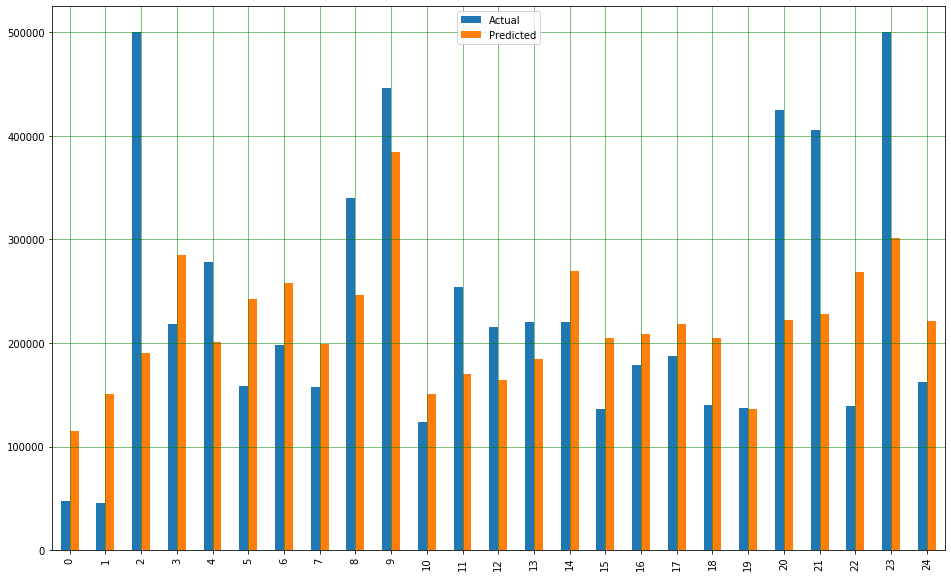

In [178]:
#Plot bar chart for Y_Test and Y_Pred , and compare the values
df1_med = df_med.head(25)
df1_med.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [179]:
#Print the RMSE Value
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(Y_test,Y_med_test_pred))
RMSE

84209.01241414454

In [180]:
#Print the accuracy
lr.score(X_med_test_std,Y_test)

0.45885918903846656

RMSE = 84209.01241414454 and Accuracy = 0.45885918903846656 , hence we conclude that the model is not good.

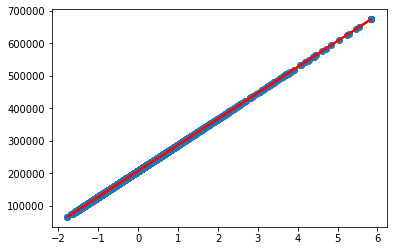

In [181]:
#plot for test data
import matplotlib.pyplot as plt
plt.scatter(X_med_test_std,Y_med_test_pred)
plt.plot(X_med_test_std,Y_med_test_pred,color="red",linewidth=2)
plt.show()

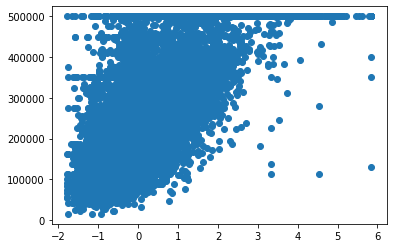

In [182]:
#plot for train data
plt.scatter(X_med_train_std,Y_train)
plt.show()